<a href="https://colab.research.google.com/github/minjaecd123/study/blob/master/20250324_RandomForest_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_json("/content/drive/MyDrive/syon/Data/merge_trends_weather_long.jsonl", lines=True)

df

,Date,GroupName,Gender,Age_Group,STN,Temperature,Humidity,Precipitation
0,20200325,집밥,f,10대,108,12.5,33.6,-9.0
1,20200325,집밥,f,10대,159,13.0,57.1,-9.0
2,20200325,집밥,f,10대,133,13.6,48.4,-9.0
3,20200325,집밥,f,10대,112,11.7,52.6,-9.0
4,20200325,집밥,f,10대,156,14.2,46.9,-9.0
...,...,...,...,...,...,...,...,...
350395,20250323,집밥,m,60대 이상,143,17.5,33.0,-9.0
350396,20250323,집밥,m,60대 이상,217,12.3,43.0,-9.0
350397,20250323,집밥,m,60대 이상,138,14.6,54.5,-9.0
350398,20250323,집밥,m,60대 이상,253,16.7,41.1,-9.0


In [5]:
df['GroupName'].value_counts()

,count
GroupName,
집밥,212448
안주,81312
간편식,53664
건강식,1824
스낵,1152


# 정확도 좋은것 따로 분류

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리 (-9.0 또는 NaN을 0으로 대체)
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 범주형 데이터 인코딩 (Label Encoding)
label_cols = ['GroupName', 'Gender', 'Age_Group', 'Date']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # 필요하면 나중에 해석용으로 사용

# 4. 입력 변수(X), 타겟 변수(y) 분리
X = df.drop(columns=['GroupName'])  # 예측 대상 제외
y = df['GroupName']  # 음식 그룹 라벨

# 5. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6386
           1       1.00      0.76      0.86        25
           2       1.00      0.77      0.87       102
           3       0.93      0.92      0.93      8851
           4       0.97      0.98      0.97     19676

    accuracy                           0.96     35040
   macro avg       0.97      0.87      0.91     35040
weighted avg       0.96      0.96      0.96     35040



✅ Classification Report
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      6413
           1       1.00      0.03      0.07        29
           2       1.00      0.10      0.19       105
           3       0.75      0.74      0.74      8861
           4       0.91      0.94      0.92     19632

    accuracy                           0.84     35040
   macro avg       0.88      0.51      0.53     35040
weighted avg       0.84      0.84      0.84     35040

✅ Confusion Matrix


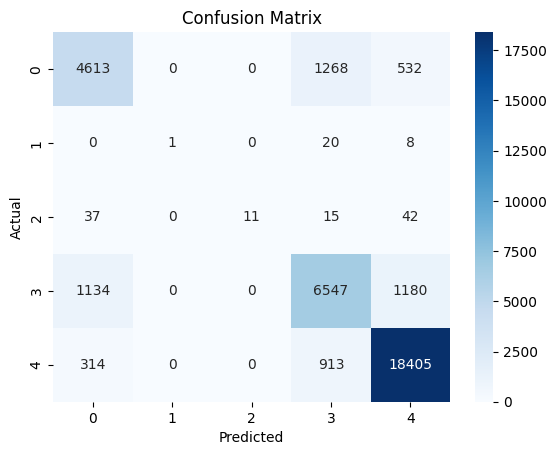

✅ Accuracy Score: 0.8440924657534247
✅ Cross-Validation Scores: [0.02491438 0.50507991 0.34277968 0.31917808 0.56130137]
✅ 평균 교차검증 정확도: 0.35065068493150686


<ipython-input-5-b76a20847513>:77: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


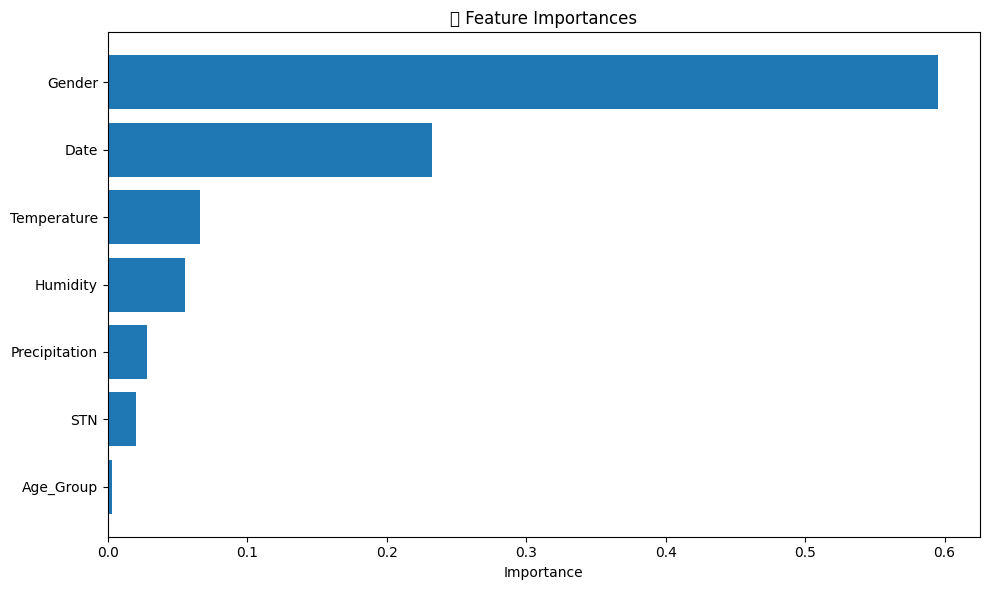

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리 (-9.0 또는 NaN을 0으로 대체)
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 범주형 데이터 인코딩
label_cols = ['GroupName', 'Gender', 'Age_Group', 'Date']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. 입력 변수(X), 타겟 변수(y) 분리
X = df.drop(columns=['GroupName'])
y = df['GroupName']

# 5. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. 모델 학습 (하이퍼파라미터 튜닝)
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)

print("✅ Classification Report")
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 8. 교차검증 정확도
cv_scores = cross_val_score(model, X, y, cv=5)
print("✅ Cross-Validation Scores:", cv_scores)
print("✅ 평균 교차검증 정확도:", np.mean(cv_scores))

# 9. 특성 중요도 시각화
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("📊 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,87600
1,87600


# 개선코드 1 (개선필요)

✅ Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6413
           1       1.00      0.86      0.93        29
           2       1.00      0.81      0.89       105
           3       0.95      0.95      0.95      8861
           4       0.98      0.98      0.98     19632

    accuracy                           0.97     35040
   macro avg       0.98      0.91      0.94     35040
weighted avg       0.97      0.97      0.97     35040

✅ Confusion Matrix


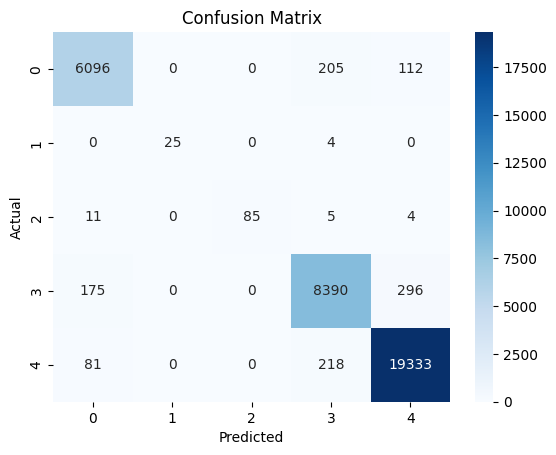

✅ Accuracy Score: 0.9682933789954338
✅ Cross-Validation Scores: [0.03273402 0.46127283 0.22226027 0.30856164 0.56269977]
✅ 평균 교차검증 정확도: 0.31750570776255704


<ipython-input-7-252263de6174>:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


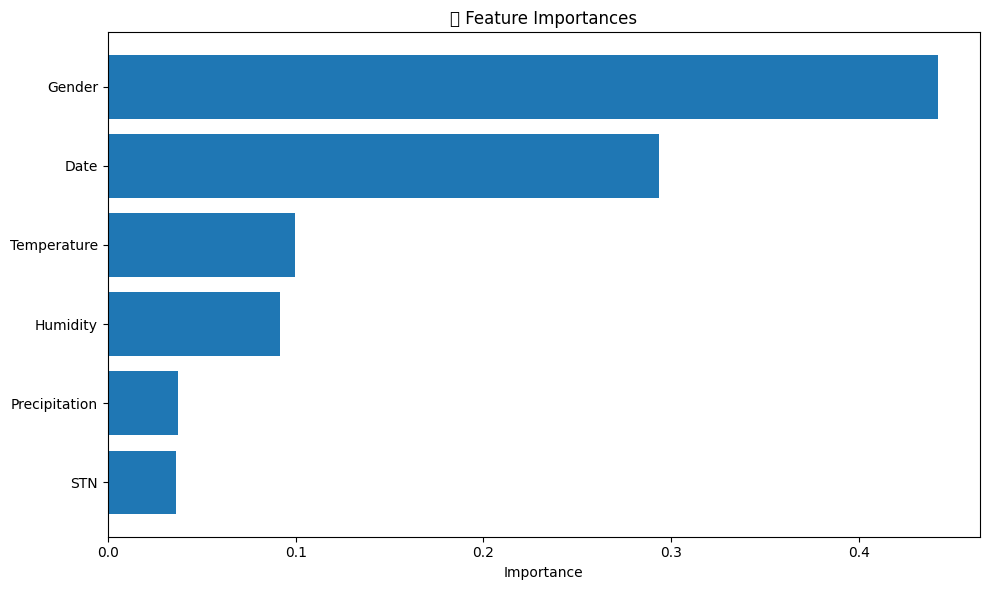

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리 (-9.0 또는 NaN을 0으로 대체)
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 범주형 데이터 인코딩
label_cols = ['GroupName', 'Gender', 'Age_Group', 'Date']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. 입력 변수(X), 타겟 변수(y) 분리
X = df.drop(columns=['GroupName'])
y = df['GroupName']

# 5. 특성 중요도 기반 불필요한 변수 제거
model_temp = RandomForestClassifier(n_estimators=100, random_state=42)
model_temp.fit(X, y)
importances = model_temp.feature_importances_

# 중요도가 낮은 피처 제거 (예: 상위 90%만 유지)
important_features = [X.columns[i] for i in np.argsort(importances)[-int(0.9 * len(importances)):]]
X = X[important_features]

# 6. 데이터 정규화
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 7. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. 모델 학습 (하이퍼파라미터 개선)
model = RandomForestClassifier(
    n_estimators=300,        # 트리 개수 증가
    max_depth=20,            # 최대 깊이 증가
    min_samples_split=4,     # 분할 최소 샘플 수 조정
    min_samples_leaf=2,      # 최소 리프 노드 샘플 수 조정
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 9. 예측 및 평가
y_pred = model.predict(X_test)

print("✅ Classification Report")
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 10. 교차검증 정확도
cv_scores = cross_val_score(model, X, y, cv=5)
print("✅ Cross-Validation Scores:", cv_scores)
print("✅ 평균 교차검증 정확도:", np.mean(cv_scores))

# 11. 특성 중요도 시각화
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("📊 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


#Date 컬럼에서 월(month)만 추출하고, 원래 Date 컬럼을 제거한 후
## 개선코드 (개선필요) Month 컬럼을대신사용하는 방식

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리 (-9.0 또는 NaN을 0으로 대체)
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 날짜에서 월(month) 추출
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# 4. 범주형 데이터 인코딩 (Label Encoding)
label_cols = ['GroupName', 'Gender', 'Age_Group']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # 필요하면 나중에 해석용으로 사용

# 5. 입력 변수(X), 타겟 변수(y) 분리
X = df.drop(columns=['GroupName', 'Date',"Gender"])  # 예측 대상과 날짜 컬럼 제외
y = df['GroupName']  # 음식 그룹 라벨

# 6. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.06      0.05      0.05      6386
           1       0.78      0.72      0.75        25
           2       0.68      0.54      0.60       102
           3       0.21      0.18      0.19      8851
           4       0.40      0.44      0.42     19676

    accuracy                           0.30     35040
   macro avg       0.42      0.39      0.40     35040
weighted avg       0.29      0.30      0.29     35040



# 개선코드 (개선필요) 건강식       0.00      0.00      0.00         6 정확도 날아감

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 이상치 또는 결측값 확인 및 전처리
df = df[df['Precipitation'] != -9.0]  # 강수량 이상치 제거 예시

# 3. 날짜 데이터를 '월', '일'로 분해 (날짜를 숫자형으로 처리)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 4. 예측에 사용할 특성 선택
features = ['Month', 'Day', 'Temperature', 'Humidity', 'Precipitation']
X = df[features]

# 5. 예측할 타겟 라벨
y = df['GroupName']

# 6. 문자열 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 7. 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 8. 랜덤포레스트 분류기 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. 성능 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 10. 모델 저장
joblib.dump(model, 'groupname_rf_model.pkl')
joblib.dump(label_encoder, 'groupname_label_encoder.pkl')

# 11. 예측 함수 예시
def predict_groupname(month, day, temp, humidity, precipitation):
    model = joblib.load('groupname_rf_model.pkl')
    label_encoder = joblib.load('groupname_label_encoder.pkl')
    input_data = pd.DataFrame([[month, day, temp, humidity, precipitation]], columns=features)
    pred = model.predict(input_data)
    return label_encoder.inverse_transform(pred)[0]

# 예시 입력값으로 예측
example = predict_groupname(month=3, day=21, temp=13.5, humidity=60.0, precipitation=0.0)
print("예측된 GroupName:", example)


              precision    recall  f1-score   support

         간편식       0.24      0.22      0.23      2603
         건강식       0.00      0.00      0.00         6
          스낵       0.87      0.95      0.91        21
          안주       0.33      0.33      0.33      3381
          집밥       0.47      0.48      0.48      7864

    accuracy                           0.40     13875
   macro avg       0.38      0.40      0.39     13875
weighted avg       0.39      0.40      0.39     13875

예측된 GroupName: 집밥


# (최종) date 날리고 month와 day 남김

📊 Classification Report:
              precision    recall  f1-score   support

         간편식       0.90      0.90      0.90      6386
         건강식       1.00      0.68      0.81        25
          스낵       1.00      0.72      0.83       102
          안주       0.90      0.90      0.90      8851
          집밥       0.97      0.97      0.97     19676

    accuracy                           0.94     35040
   macro avg       0.95      0.83      0.88     35040
weighted avg       0.94      0.94      0.94     35040

🔮 예측된 GroupName: 집밥


<ipython-input-10-7a856f88de04>:113: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


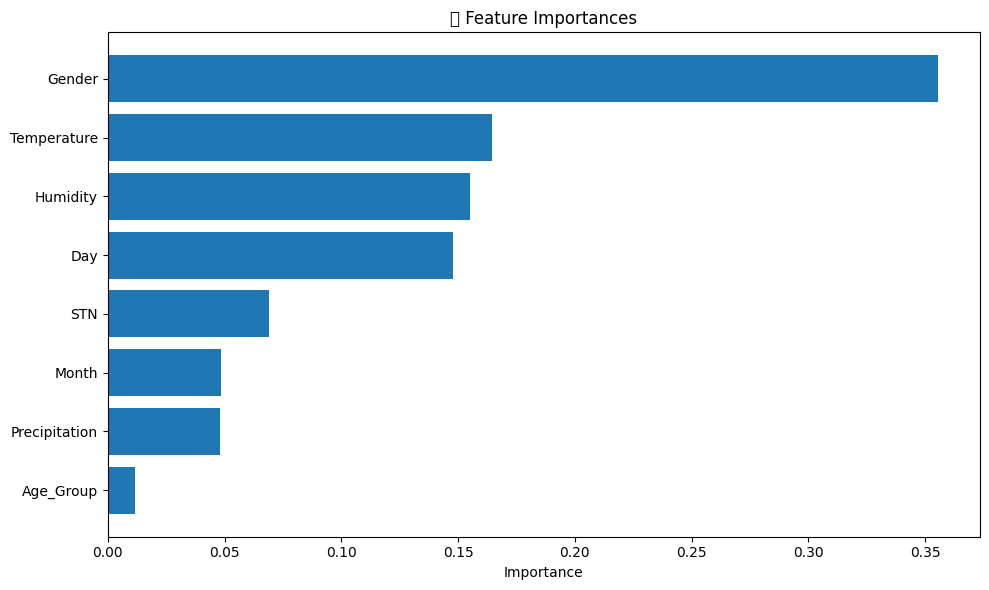

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import numpy as np
import matplotlib.pyplot as plt


# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 날짜 분해 (Date → Month, Day)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 4. 라벨 인코딩 (GroupName, Gender, Age_Group)
label_cols = ['GroupName', 'Gender', 'Age_Group']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. 사용 피처 정의 (순서 중요!)
features = ['Month', 'Day', 'Temperature', 'Humidity', 'Precipitation', 'Gender', 'Age_Group', 'STN']
X = df[features]
y = df['GroupName']

# 6. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. 성능 평가
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['GroupName'].classes_))

# 9. 모델 및 인코더 저장
joblib.dump(model, '/content/drive/MyDrive/project/groupname_rf_model.pkl')
joblib.dump(label_encoders['GroupName'], '/content/drive/MyDrive/project/groupname_label_encoder.pkl')
joblib.dump(label_encoders['Gender'], '/content/drive/MyDrive/project/gender_label_encoder.pkl')
joblib.dump(label_encoders['Age_Group'], '/content/drive/MyDrive/project/age_label_encoder.pkl')

# 10. 예측 함수 정의
def predict_groupname(input_dict):
    """
    input_dict 예시:
    {
        'Gender': 'f',
        'Age_Group': '10~20대',
        'STN': 108,
        'Month': 3,
        'Day': 21,
        'Temperature': 13.5,
        'Humidity': 60.0,
        'Precipitation': 0.0
    }
    """
    # 모델 및 인코더 로드
    model = joblib.load('/content/drive/MyDrive/project/groupname_rf_model.pkl')
    groupname_encoder = joblib.load('/content/drive/MyDrive/project/groupname_label_encoder.pkl')
    gender_encoder = joblib.load('/content/drive/MyDrive/project/gender_label_encoder.pkl')
    age_encoder = joblib.load('/content/drive/MyDrive/project/age_label_encoder.pkl')

    # 인코딩 처리
    input_data = input_dict.copy()
    input_data['Gender'] = gender_encoder.transform([input_data['Gender']])[0]
    input_data['Age_Group'] = age_encoder.transform([input_data['Age_Group']])[0]

    # DataFrame 생성 및 컬럼 순서 맞추기
    input_df = pd.DataFrame([input_data])
    input_df = input_df[features]  # 학습 시 사용한 feature 순서와 동일하게 정렬

    # 예측
    prediction = model.predict(input_df)
    return groupname_encoder.inverse_transform(prediction)[0]

# 11. 예측 예시
example_input = {
    'Gender': 'f',
    'Age_Group': '10~20대',
    'STN': 108,
    'Month': 3,
    'Day': 21,
    'Temperature': 13.5,
    'Humidity': 60.0,
    'Precipitation': 0.0
}

predicted_group = predict_groupname(example_input)
print("🔮 예측된 GroupName:", predicted_group)


importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("📊 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 결과 분석
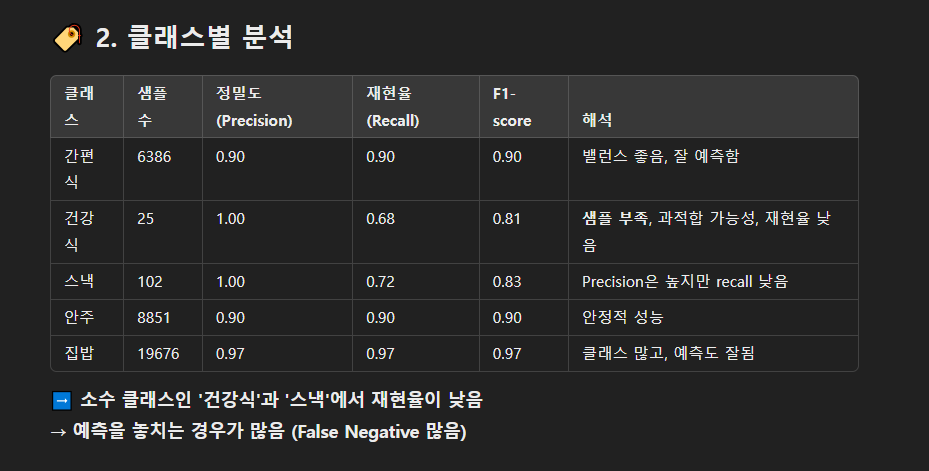

#가중치 부여
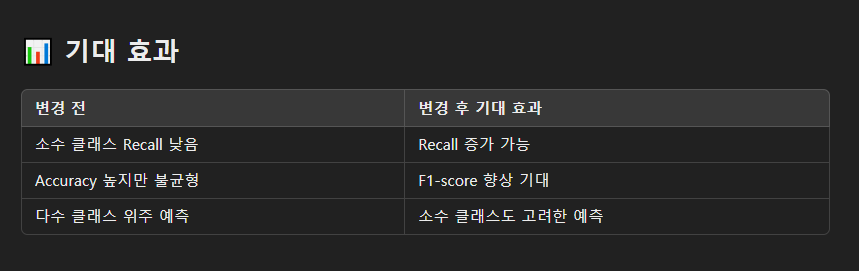
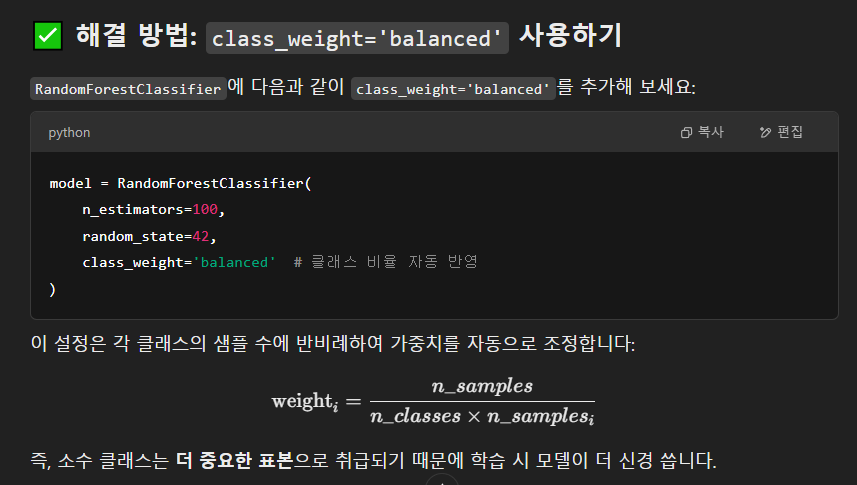

📊 Classification Report:
              precision    recall  f1-score   support

         간편식       0.89      0.90      0.90      6386
         건강식       0.71      0.68      0.69        25
          스낵       0.98      0.81      0.89       102
          안주       0.90      0.90      0.90      8851
          집밥       0.97      0.96      0.97     19676

    accuracy                           0.94     35040
   macro avg       0.89      0.85      0.87     35040
weighted avg       0.94      0.94      0.94     35040

🔮 예측된 GroupName: 집밥


<ipython-input-8-779b62ff374a>:116: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


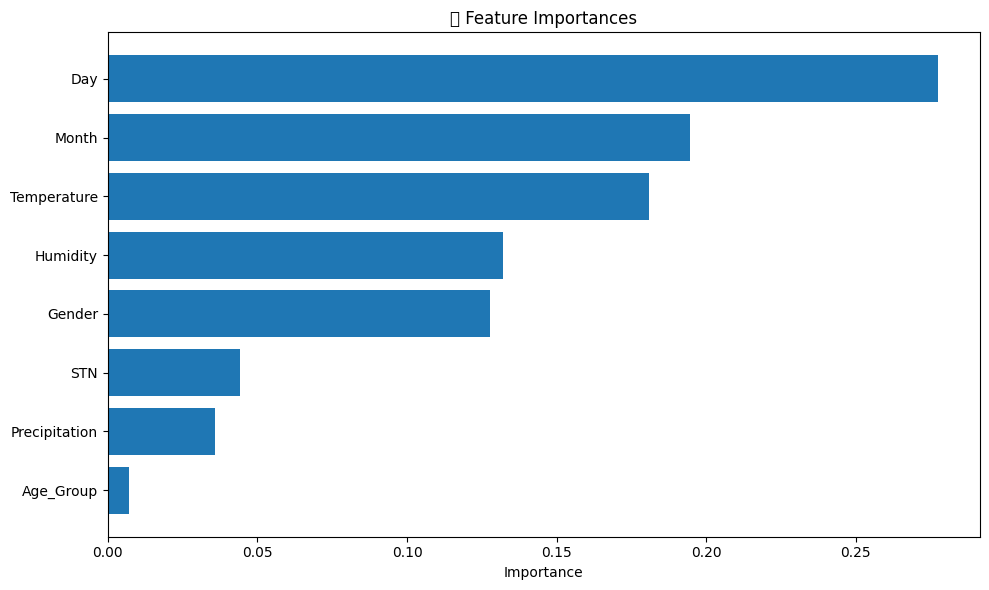

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 날짜 분해 (Date → Month, Day)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 4. 라벨 인코딩 (GroupName, Gender, Age_Group)
label_cols = ['GroupName', 'Gender', 'Age_Group']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. 사용 피처 정의 (순서 중요!)
features = ['Month', 'Day', 'Temperature', 'Humidity', 'Precipitation', 'Gender', 'Age_Group', 'STN']
X = df[features]
y = df['GroupName']

# 6. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 모델 학습 (가중치 적용)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # 클래스 불균형 자동 보정
)
model.fit(X_train, y_train)

# 8. 성능 평가
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['GroupName'].classes_))

# 9. 모델 및 인코더 저장
joblib.dump(model, '/content/drive/MyDrive/project/groupname_rf_model.pkl')
joblib.dump(label_encoders['GroupName'], '/content/drive/MyDrive/project/groupname_label_encoder.pkl')
joblib.dump(label_encoders['Gender'], '/content/drive/MyDrive/project/gender_label_encoder.pkl')
joblib.dump(label_encoders['Age_Group'], '/content/drive/MyDrive/project/age_label_encoder.pkl')

# 10. 예측 함수 정의
def predict_groupname(input_dict):
    """
    input_dict 예시:
    {
        'Gender': 'f',
        'Age_Group': '10~20대',
        'STN': 108,
        'Month': 3,
        'Day': 21,
        'Temperature': 13.5,
        'Humidity': 60.0,
        'Precipitation': 0.0
    }
    """
    # 모델 및 인코더 로드
    model = joblib.load('/content/drive/MyDrive/project/groupname_rf_model.pkl')
    groupname_encoder = joblib.load('/content/drive/MyDrive/project/groupname_label_encoder.pkl')
    gender_encoder = joblib.load('/content/drive/MyDrive/project/gender_label_encoder.pkl')
    age_encoder = joblib.load('/content/drive/MyDrive/project/age_label_encoder.pkl')

    # 인코딩 처리
    input_data = input_dict.copy()
    input_data['Gender'] = gender_encoder.transform([input_data['Gender']])[0]
    input_data['Age_Group'] = age_encoder.transform([input_data['Age_Group']])[0]

    # DataFrame 생성 및 컬럼 순서 맞추기
    input_df = pd.DataFrame([input_data])
    input_df = input_df[features]  # 학습 시 사용한 feature 순서와 동일하게 정렬

    # 예측
    prediction = model.predict(input_df)
    return groupname_encoder.inverse_transform(prediction)[0]

# 11. 예측 예시
example_input = {
    'Gender': 'f',
    'Age_Group': '10~20대',
    'STN': 108,
    'Month': 3,
    'Day': 21,
    'Temperature': 13.5,
    'Humidity': 60.0,
    'Precipitation': 0.0
}

predicted_group = predict_groupname(example_input)
print("🔮 예측된 GroupName:", predicted_group)

# 12. 피처 중요도 시각화
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("📊 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


#day 의존도가 높아 빼고 진행

📊 Classification Report:
              precision    recall  f1-score   support

         간편식       0.66      0.66      0.66      6386
         건강식       0.25      0.04      0.07        25
          스낵       0.86      0.18      0.29       102
          안주       0.68      0.70      0.69      8851
          집밥       0.91      0.90      0.90     19676

    accuracy                           0.80     35040
   macro avg       0.67      0.50      0.52     35040
weighted avg       0.81      0.80      0.80     35040

🔮 예측된 GroupName: 집밥


<ipython-input-1-7f13432d18bb>:98: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


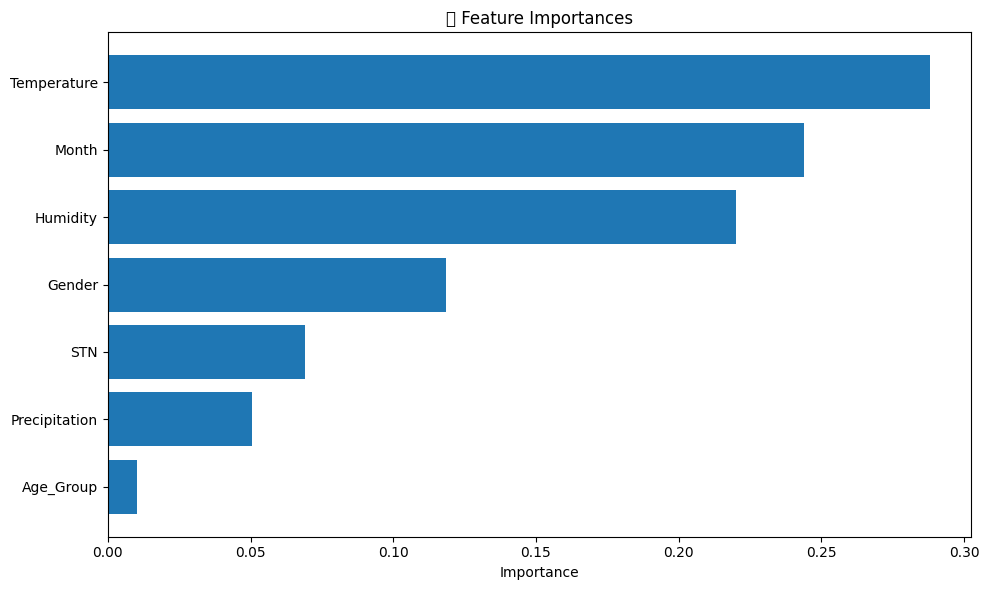

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_json("/content/drive/MyDrive/project/merge_trends_weather_long.jsonl", lines=True)

# 2. 결측치 처리
df.replace(-9.0, 0, inplace=True)
df.fillna(0, inplace=True)

# 3. 날짜 분해 (Date → Month)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Month'] = df['Date'].dt.month
# df['Day']는 제거

# 4. 라벨 인코딩 (GroupName, Gender, Age_Group)
label_cols = ['GroupName', 'Gender', 'Age_Group']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. 사용 피처 정의 (Day 제외)
features = ['Month', 'Temperature', 'Humidity', 'Precipitation', 'Gender', 'Age_Group', 'STN']
X = df[features]
y = df['GroupName']

# 6. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 모델 학습 (가중치 적용)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# 8. 성능 평가
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['GroupName'].classes_))

# 9. 모델 및 인코더 저장
joblib.dump(model, '/content/drive/MyDrive/project/groupname_rf_model.pkl')
joblib.dump(label_encoders['GroupName'], '/content/drive/MyDrive/project/groupname_label_encoder.pkl')
joblib.dump(label_encoders['Gender'], '/content/drive/MyDrive/project/gender_label_encoder.pkl')
joblib.dump(label_encoders['Age_Group'], '/content/drive/MyDrive/project/age_label_encoder.pkl')

# 10. 예측 함수 정의
def predict_groupname(input_dict):
    model = joblib.load('/content/drive/MyDrive/project/groupname_rf_model.pkl')
    groupname_encoder = joblib.load('/content/drive/MyDrive/project/groupname_label_encoder.pkl')
    gender_encoder = joblib.load('/content/drive/MyDrive/project/gender_label_encoder.pkl')
    age_encoder = joblib.load('/content/drive/MyDrive/project/age_label_encoder.pkl')

    input_data = input_dict.copy()
    input_data['Gender'] = gender_encoder.transform([input_data['Gender']])[0]
    input_data['Age_Group'] = age_encoder.transform([input_data['Age_Group']])[0]

    input_df = pd.DataFrame([input_data])
    input_df = input_df[features]

    prediction = model.predict(input_df)
    return groupname_encoder.inverse_transform(prediction)[0]

# 11. 예측 예시
example_input = {
    'Gender': 'f',
    'Age_Group': '10~20대',
    'STN': 108,
    'Month': 3,
    'Temperature': 13.5,
    'Humidity': 60.0,
    'Precipitation': 0.0
}

predicted_group = predict_groupname(example_input)
print("🔮 예측된 GroupName:", predicted_group)

# 12. 피처 중요도 시각화
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("📊 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()